<a href="https://colab.research.google.com/github/Atharva-Waghmare/Deep_Learning/blob/main/practice_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai.data.all import *
from PIL import Image
import pandas as pd
import torch
path=untar_data(URLs.MNIST_SAMPLE)

In [3]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

In [4]:
threes=(path/'train'/'3').ls().sorted()
sevens=(path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png'),Path('/root/.fastai/data/mnist_sample/train/3/10093.png'),Path('/root/.fastai/data/mnist_sample/train/3/10097.png'),Path('/root/.fastai/data/mnist_sample/train/3/10099.png'),Path('/root/.fastai/data/mnist_sample/train/3/10116.png'),Path('/root/.fastai/data/mnist_sample/train/3/10125.png'),Path('/root/.fastai/data/mnist_sample/train/3/10137.png'),Path('/root/.fastai/data/mnist_sample/train/3/10141.png'),Path('/ro

In [5]:
x=threes[1]
im=Image.open(x)
im

In [6]:
df=pd.DataFrame(tensor(im)[4:22,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [7]:
three_tensors=[tensor(Image.open(o)) for o in threes]
seven_tensors=[tensor(Image.open(o)) for o in sevens]

<Axes: >

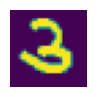

In [8]:
show_image(three_tensors[5])

<Axes: >

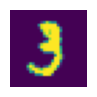

In [9]:
stacked_threes=torch.stack(three_tensors).float()/255
stacked_sevens=torch.stack(seven_tensors).float()/255
mean_3=stacked_threes.mean(0)
mean_7=stacked_sevens.mean(0)
# show_image(mean_3)
a3=stacked_threes[0]
a7=stacked_sevens[0]
show_image(a3)

In [10]:
dis_abs_3=(a3-mean_3).abs().mean()
dis_abs_7=(a3-mean_7).abs().mean()
dis_sq_3=(a3-mean_3).pow(2).mean().sqrt()
dis_sq_7=(a3-mean_7).pow(2).mean().sqrt()
dis_abs_3,dis_sq_3

(tensor(0.1074), tensor(0.1912))

In [11]:
F.l1_loss(a3.float(),mean_3)

tensor(0.1074)

In [12]:
valid_3_tens=torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_7_tens=torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_3_tens=valid_3_tens.float()/255
valid_7_tens=valid_7_tens.float()/255
valid_3_tens.shape

torch.Size([1010, 28, 28])

In [13]:
def mnist_dist(a,b) : return (a-b).abs().mean((-1,-2))
mnist_valid_3_dist=mnist_dist(valid_3_tens,mean_3)
mnist_valid_7_dist=mnist_dist(valid_7_tens,mean_7)
mnist_valid_3_dist

tensor([0.1433, 0.1306, 0.1148,  ..., 0.1242, 0.1061, 0.1265])

In [14]:
def is_3(x): return mnist_dist(x,mean_3) < mnist_dist(x,mean_7)
is_3(a3)
is_3(a7)

tensor(False)

In [15]:
acc_3= is_3(valid_3_tens).float().mean()
acc_7=(1-is_3(valid_7_tens).float().mean())
acc_3,acc_7,(acc_3+acc_7)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [16]:
def f(x) : return x**2
xt=tensor(3.).requires_grad_()
yt=f(xt)
# yt.backward()
xt.grad

In [17]:
time=torch.arange(0,20).float()
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

In [18]:
def f(t,params):
  a,b,c=params
  return a*(t**2)+(b*t)+c

In [19]:
def mse(pred,target): return ((pred-target)**2).mean()

In [20]:
params=torch.randn(3).requires_grad_()
preds= f(time,params)

In [21]:
loss=mse(preds,speed)
loss

tensor(9113.4854, grad_fn=<MeanBackward0>)

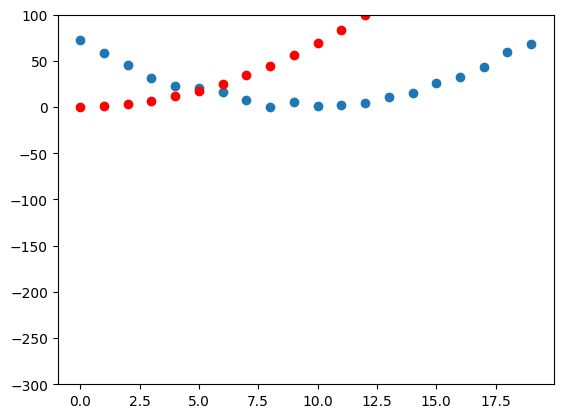

In [22]:
def show_preds(preds, ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-300,100)
show_preds(preds)

In [23]:
loss.backward()

In [24]:
train_x=torch.cat([stacked_threes,stacked_sevens]).view(-1,28*28)
train_y=tensor([1]*len(threes)+[0]*len(sevens)).unsqueeze(1)
dset=list(zip(train_x,train_y))
x,y=dset[0]
valid_x=torch.cat([valid_3_tens,valid_7_tens]).view(-1,28*28)
valid_y=tensor([1]*len(valid_3_tens)+[0]*len(valid_7_tens)).unsqueeze(1)
valid_dset=list(zip(valid_x,valid_y))

In [25]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights=init_params((28*28,1))
bias=init_params(1)

In [26]:
def linear1(xb): return xb@weights+bias
preds=linear1(train_x)
preds

tensor([[-8.2401],
        [-6.0395],
        [ 0.6329],
        ...,
        [ 0.1042],
        [ 1.8943],
        [-8.5206]], grad_fn=<AddBackward0>)

In [27]:
corrects=(preds>0.0).float()==train_y
corrects
corrects.float().mean().item()

0.6023717522621155

In [28]:
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [29]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape
valid_dl = DataLoader(valid_dset, batch_size=256)

In [30]:
batch = train_x[:4]
batch.shape
preds = linear1(batch)
preds
loss = mnist_loss(preds, train_y[:4])
loss
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0175), tensor([-0.1099]))

In [31]:
def calc_grad(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()

In [32]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0350), tensor([-0.2199]))

In [33]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0524), tensor([-0.3298]))

In [34]:
weights.grad.zero_()
bias.grad.zero_();

In [35]:
def train_epoch(model, lr, params):
  for xb,yb in dl:
    calc_grad(xb, yb, model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [36]:
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()

batch_accuracy(linear1(batch), train_y[:4])

tensor(0.5000)

In [37]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)
validate_epoch(linear1)

0.5906

In [38]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.7054

In [39]:
for i in range(20):
  train_epoch(linear1, lr, params)
  print(validate_epoch(linear1), end=' ')

0.849 0.9061 0.9325 0.9432 0.952 0.9564 0.9593 0.9608 0.9637 0.9662 0.9676 0.9686 0.9696 0.9705 0.971 0.9715 0.9735 0.9735 0.974 0.9749 

In [43]:
linear_model = nn.Linear(28*28,1)
w,b = linear_model.parameters()
class BasicOptim:
  def __init__(self,params,lr): self.params,self.lr = list(params),lr
  def step(self, *args, **kwargs):
    for p in self.params: p.data -= p.grad.data * self.lr
    def zero_grad(self, *args, **kwargs):
      for p in self.params: p.grad = None

opt = BasicOptim(linear_model.parameters(), lr)

In [41]:
def train_epoch(model):
  for xb,yb in dl:
    calc_grad(xb, yb, model)
    opt.step()
    opt.zero_grad()
validate_epoch(linear_model)

0.4966

In [44]:
def train_model(model, epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end=' ')

train_model(linear_model, 20)

0.4932 0.7788 0.856 0.917 0.936 0.9492 0.957 0.9633 0.9663 0.9682 0.9697 0.9716 0.9731 0.9746 0.976 0.9765 0.978 0.978 0.9785 0.9785 

In [53]:
from fastai.learner import Learner
from torch import optim
import torch.nn as nn
from fastai.data.core import DataLoaders
from fastai.optimizer import SGD as fastai_SGD

class simple_net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(28*28, 1)
    def forward(self, x):
        return self.linear(x)

SGD = optim.SGD

dls = DataLoaders(dl, valid_dl)

learn = Learner(dls, simple_net(), opt_func=fastai_SGD,
loss_func=mnist_loss, metrics=batch_accuracy)

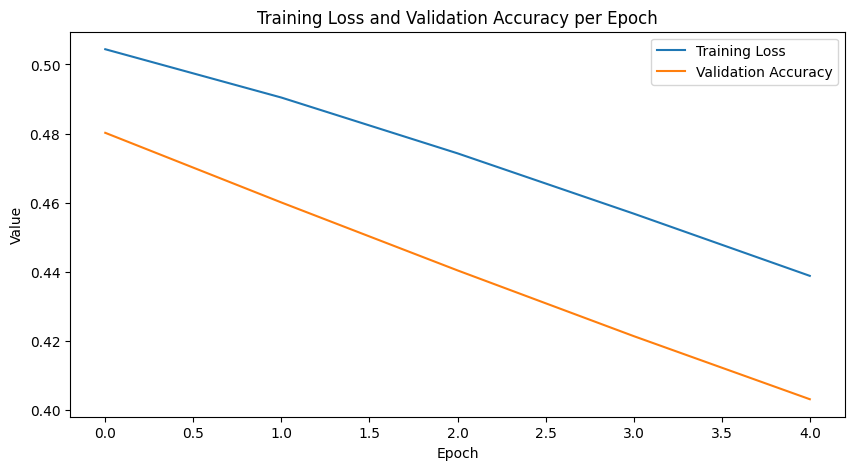

In [56]:
import matplotlib.pyplot as plt

if hasattr(learn, 'recorder') and learn.recorder is not None and hasattr(learn.recorder, 'values'):
    epochs = range(len(learn.recorder.values))
    loss_values = [x[0] for x in learn.recorder.values]
    accuracy_values = [x[1] for x in learn.recorder.values]

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss_values, label='Training Loss')
    plt.plot(epochs, accuracy_values, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Training Loss and Validation Accuracy per Epoch')
    plt.legend()
    plt.show()
else:
    print("Metrics not recorded. Please ensure the model was trained using learn.fit().")

In [57]:
learn.recorder.values[-1][2]

0.9435721039772034